### Que:  Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.


In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
df1=df.drop(columns="State")
df1.head(3)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


In [5]:
x = df1.drop("Profit",axis = 1)
y = df1["Profit"]

In [6]:
from sklearn.model_selection import train_test_split                                   
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.40,random_state=45)  

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(x_test)

In [9]:
from sklearn.metrics import r2_score

In [10]:
r2 =r2_score(y_test,y_pred)
r2

0.9380749629901777

In [12]:
model_results = pd.DataFrame(columns=['Model', 'R-squared'])
model_results = model_results.append({'Model': 'Linear Regression', 'R-squared': r2}, ignore_index=True)


C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_13664\1086768025.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_results = model_results.append({'Model': 'Linear Regression', 'R-squared': r2}, ignore_index=True)


In [13]:
print("\nResults Table:")
print(model_results)


Results Table:
               Model  R-squared
0  Linear Regression   0.938075


In [15]:
residuals = y_test - y_pred
residuals

47    -9363.105641
7      -781.187113
2     12235.611743
9     -3704.735174
5     -4633.804977
26    -5546.936045
13     7616.827341
37    -5014.195400
0      5739.624608
19     5983.600238
20     1515.478143
18    -4464.365636
16     9823.796594
40      138.558096
44    -2825.373940
36    12783.804806
49   -39316.886101
25     3896.201976
46    -9951.199960
48   -22538.439747
Name: Profit, dtype: float64

In [31]:
from scipy.stats import zscore
z_scores = zscore(residuals)
outliers = np.where(np.abs(z_scores) > 3)

print("Outliers:", outliers)

Outliers: (array([16], dtype=int64),)


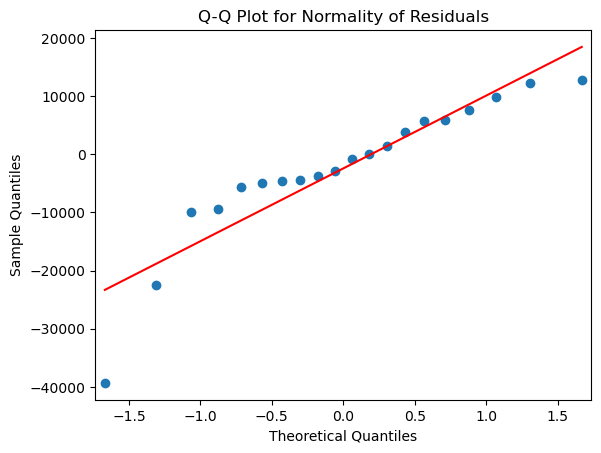

In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.qqplot(residuals, line='r')
plt.title('Q-Q Plot for Normality of Residuals')
plt.show()

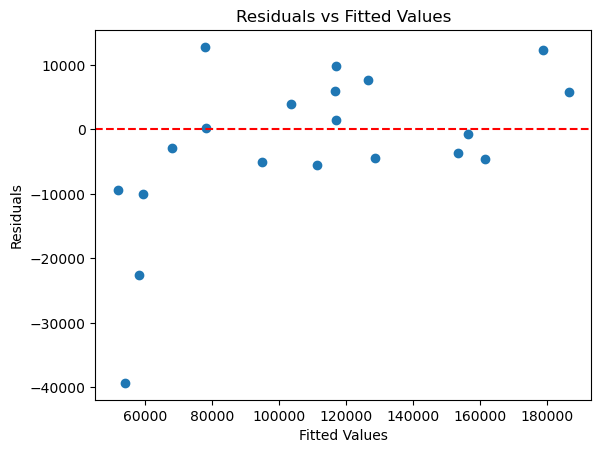

In [18]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

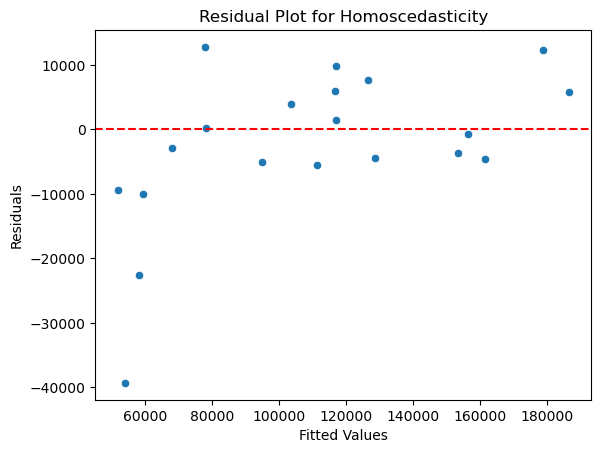

In [20]:
import seaborn as sns
sns.scatterplot(x=y_pred, y=residuals, marker='o')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.pipeline import Pipeline
influence = OLSInfluence(sm.OLS(y_test, sm.add_constant(y_pred)).fit()).influence
influence

47     338.447123
7     -700.358572
2      972.881822
9     -934.287024
5    -1486.905568
26    -174.735937
13     463.044617
37     -17.687417
0    -1004.893685
19     399.051632
20     156.056209
18    -314.283607
16     605.712876
40     646.816293
44     682.352024
36    1757.731246
49   -4714.228388
25     395.046892
46      27.088514
48   -1811.579680
dtype: float64

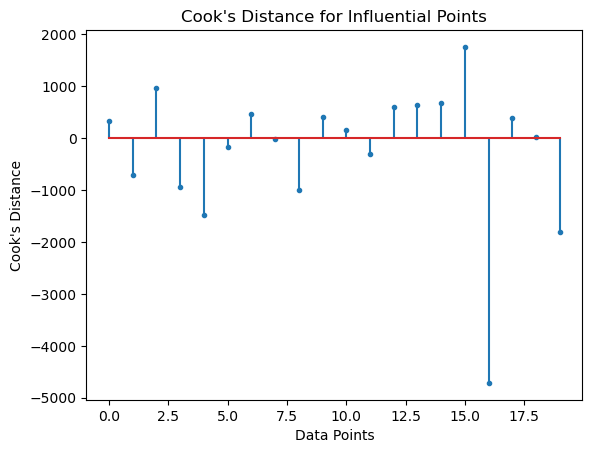

In [28]:
plt.stem(np.arange(len(influence)), influence, markerfmt='.')
plt.title('Cook\'s Distance for Influential Points')
plt.xlabel('Data Points')
plt.ylabel('Cook\'s Distance')
plt.show()